## ANOVA - Analysis Of Variances
## Anova tests the equality of means from different samples
## We define two key points, the variation within - i.e. the variation that can be found in one of the amples we are testing and variation between - the variation in the means of the different samples we are testing.

$$
H_0: \mu_A = \mu_B = \mu_C = \dots = \mu_k \\
H_a: \text{At least one of the means is different from the others}
$$

## Why can we not just do multiple t-tests?
## The number of t-tests we need to do as the number of samples increases is equal to the (n-1)'th triangle number.
## Calculating this many t-tests is doable, but it hides a problem. For each test we have a alpha of say 0.05 or 95% confidence. Say we compare 4 samples, this would require 6 total t-tests to compare every sample with every other sample. For each of these 6 tests the alpha is 0.05. It can be shown that the total confidence of all the tests is multiplicative, leading to a confidence level of (0.95)^6 = 0.735, not desireable. To achieve 95% confidence we would therefore have to impose a confidence of around 99.6% on each individual test, which is very strict and may miss noteworthy differences between the samples.  


## For any of the interested samples the variance is given by:
$$
s^2 = \frac{\Sigma (x_i - \bar{x})^2}{n-1}
$$

## Numerator - sum of squares; Denominator - degrees of freedom for the sample

## Anova extends this naturally with:

$$
F = \frac{MSS_{between}}{MSS_{within}} = \frac{\frac{SS_{between}}{\text{df}_{between}}}{\frac{SS_{within}}{\text{df}_{within}}}
$$

## MSS - mean sum of squares, i.e. we take all the samples, calculate their means and then compare each individual value to its sample mean and take the sum of squares of the differences. This gives the Sum Of Squares Within. The Sum Of Squares Between is found by taking the means of eqch sample and comparing it to the overall mean of all the samples combined, we then multiply each of these sums of squares by the number of items in the respective sample. Now for the degrees of freedom we have the relations:

$$
\begin{align}
&\text{Total df} &= &\text{df}_{between} &+ &\text{df}_{within} \\
&(N-1) &= &(C-1) &+ &(N-c) 
\end{align}
$$

## C is the number of samples and N is the total number of observations across all samples. With this information we can find the value of the test statistic F. Now we need the critical value. for which be use df_{between} as the numerator degrees of freedom and df_{within} as the denominator degrees of freedom. This is all we need for the hypothesis test. Numerically it is a much simpler process that can be achieved in just one line of python.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import scipy.stats as stats
import statsmodels.stats.oneway as oneway

In [54]:
# say we have three machines producing perfume and we want to see if they are acting differently:

m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [55]:
stats.f_oneway(m1, m2, m3)
# since p < 0.05 we reject the null and conclude that there is at least one machine that is actins significantly different

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

In [56]:
oneway.anova_oneway((m1, m2, m3), use_var="equal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = [151.         150.83333333 155.5       ]
nobs = [6. 6. 6.]
vars_ = [0.8        3.76666667 1.1       ]
use_var = equal
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

In [57]:
# a bit more practical example, significant difference in mpg across cars produced in different countries

In [58]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [59]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [60]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [61]:
usa = mpg[mpg["origin"] == "usa"]["mpg"]
jap = mpg[mpg["origin"] == "japan"]["mpg"]
eur = mpg[mpg["origin"] == "europe"]["mpg"]

print(len(usa), len(jap), len(eur))

# much more samples for usa, not a problem

249 79 70


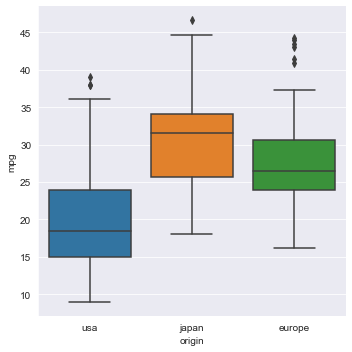

In [62]:
# lets just get a feel of the data

sns.catplot(data=mpg, x="origin", y="mpg", kind="box")

In [63]:
# now we can just perform the test

oneway.anova_oneway((usa, jap, eur))

# p < 0.05 so there is a statistically significant difference. 
# Is this test useful? Probably not since the cylinders differ so wildly 

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 101.31758855290244
pvalue = 3.998932425897766e-28
df = (2.0, 142.8974558827993)
df_num = 2.0
df_denom = 142.8974558827993
nobs_t = 398.0
n_groups = 3
means = [20.08353414 30.45063291 27.89142857]
nobs = [249.  79.  70.]
vars_ = [40.99702617 37.08868549 45.21122981]
use_var = unequal
welch_correction = True
tuple = (101.31758855290244, 3.998932425897766e-28)

In [64]:
# if we focus only on those cars with 4 cylinders
mpg = mpg[mpg["cylinders"] == 4]

usa = mpg[mpg["origin"] == "usa"]["mpg"]
jap = mpg[mpg["origin"] == "japan"]["mpg"]
eur = mpg[mpg["origin"] == "europe"]["mpg"]

print(len(usa), len(jap), len(eur))

# much more samples for usa, not a problem

72 69 63


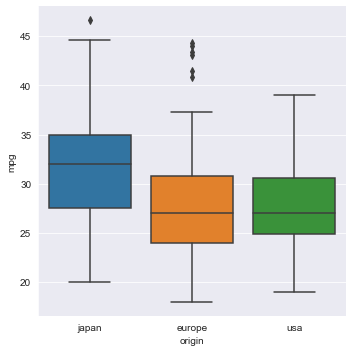

In [65]:
# lets just get a feel of the data

sns.catplot(data=mpg, x="origin", y="mpg", kind="box")

In [66]:
print(oneway.anova_oneway((usa, jap, eur)))
print("##")
oneway.anova_oneway((usa, eur))

# here we see that japan has a different mean.

statistic = 10.32754521025997
pvalue = 6.955627950266416e-05
df = (2.0, 127.82531832310414)
df_num = 2.0
df_denom = 127.82531832310414
nobs_t = 204.0
n_groups = 3
means = [27.84027778 31.59565217 28.41111111]
nobs = [72. 69. 63.]
vars_ = [20.6984957  29.54777494 41.50584229]
use_var = unequal
welch_correction = True
tuple = (10.32754521025997, 6.955627950266416e-05)
##


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.3443411239646463
pvalue = 0.5585400343651685
df = (1.0, 109.6769840165082)
df_num = 1.0
df_denom = 109.6769840165082
nobs_t = 135.0
n_groups = 2
means = [27.84027778 28.41111111]
nobs = [72. 63.]
vars_ = [20.6984957  41.50584229]
use_var = unequal
welch_correction = True
tuple = (0.3443411239646463, 0.5585400343651685)

# Post Hoc Tests

## Post hoc tests attempt to control the experimentwise error, just like ANOVA in stead of using multiple t tests.
## One popular tests is Tuckey's test.

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [68]:
df = sns.load_dataset("mpg")
df = df[df["cylinders"] == 4]
df = df[["mpg", "origin"]]
df.head()

,mpg,origin
14,24.0,japan
18,27.0,japan
19,26.0,europe
20,25.0,europe
21,24.0,europe


In [69]:
res = pairwise_tukeyhsd(endog=df["mpg"], groups=df["origin"])
print(res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
europe  japan   3.1845  0.003  0.9266  5.4425   True
europe    usa  -0.5708 0.7995 -2.8062  1.6646  False
 japan    usa  -3.7554  0.001 -5.9383 -1.5724   True
----------------------------------------------------


In [70]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [73]:
machines = pd.concat(
    [
        pd.DataFrame(data={"volume":m1, "machine":"A"}),
        pd.DataFrame(data={"volume":m2, "machine":"B"}),
        pd.DataFrame(data={"volume":m3, "machine":"C"})
    ]
)

In [75]:
res = pairwise_tukeyhsd(endog=machines["volume"], groups=machines["machine"])
print(res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B  -0.1667   0.9 -2.2269 1.8936  False
     A      C      4.5 0.001  2.4397 6.5603   True
     B      C   4.6667 0.001  2.6064 6.7269   True
--------------------------------------------------


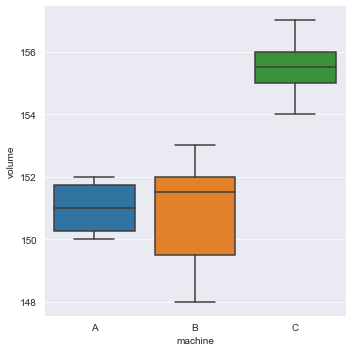

In [76]:
sns.catplot(data=machines, x="machine", y="volume", kind="box")